In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression , Ridge ,Lasso , LogisticRegression , SGDClassifier

In [16]:
data=pd.read_csv("Iris.csv")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2C2EC12B0>,
      dtype=object)

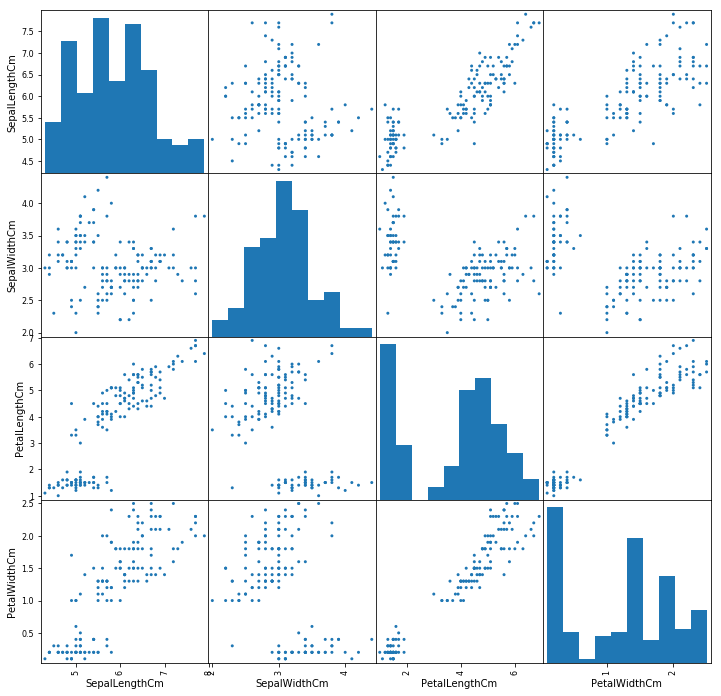

In [20]:
from pandas.plotting import scatter_matrix

attributes=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
scatter_matrix(data[attributes],alpha=1,figsize=(12,12))

In [24]:
data= data.drop(['Id'] , axis = 1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [60]:
X= data.iloc[:,0:4]
Y= data.iloc[:,-1]

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
#X = le.fit_transform(X)

In [62]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


In [65]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [66]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [67]:
Y_pred = classifier.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

In [74]:
print("accuracy is:")
print(accuracy_score(Y_test , classifier.predict(X_test)))

accuracy is:
0.9777777777777777


Text(0, 0.5, 'ErrorRate')

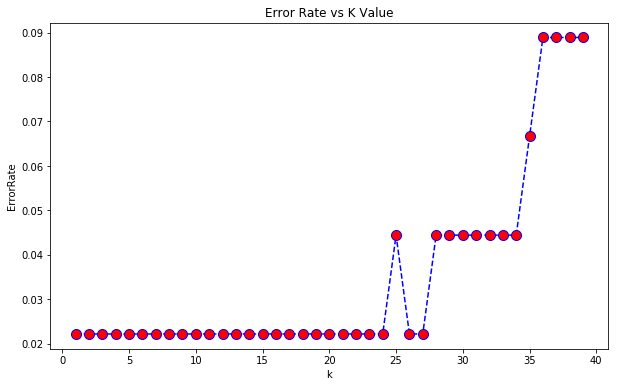

In [75]:
error_rate =[]
for i in range(1,40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,Y_train)
    pred_i =classifier.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))
    
plt.figure(figsize=(10,6))  
plt.plot(range(1,40),error_rate,color ='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('k')
plt.ylabel('ErrorRate')

In [76]:
#We can see that the error keeps on increasing as the K values increases.
#attained the accuracy of 97.77% with the values of K=3